<a href="https://colab.research.google.com/github/BrainyNBright/AI-Internship-2022/blob/main/product_propensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# write code -
#	  -one notebook 
#	  -eda stays the same 
#	  -algorithms are in seperate code cells
		
#	  -add text cells to explain each code cell
#		-short and brief to make it easy to read
		
# REFERENCE - add website links used for methodology,	
#		        -kaggle notebook etc.

In [ ]:
#https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data - DATASET

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [120]:
training = pd.read_csv('/content/training_sample.csv')

In [121]:
print(training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [122]:
training.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

We can see that "ordered" is our target feature.

The rest of the features are of integer type.

Only UserID is a String.

In [123]:
print(training.head(15))

                                 UserID  basket_icon_click  basket_add_list  \
0   a720-6b732349-a720-4862-bd21-644732                  0                0   
1   a0c0-6b73247c-a0c0-4bd9-8baa-797356                  0                0   
2   86a8-6b735c67-86a8-407b-ba24-333055                  0                0   
3   6a3d-6b736346-6a3d-4085-934b-396834                  0                0   
4   b74a-6b737717-b74a-45c3-8c6a-421140                  0                1   
5   b159-6b73a0d6-b159-4728-81a6-914765                  0                0   
6   7775-6b73b976-7775-4324-b1d9-622031                  0                0   
7   4135-6b73ba04-4135-4298-8a12-493138                  0                0   
8   a01e-6b73d2dc-a01e-4647-ac4b-940063                  0                0   
9   3816-6b73db7d-3816-4b4b-8b85-315756                  0                0   
10  aab0-6b736b29-aab0-4677-9196-338891                  0                0   
11  8976-6b747629-8976-4926-9cb2-715368             

<function matplotlib.pyplot.show>

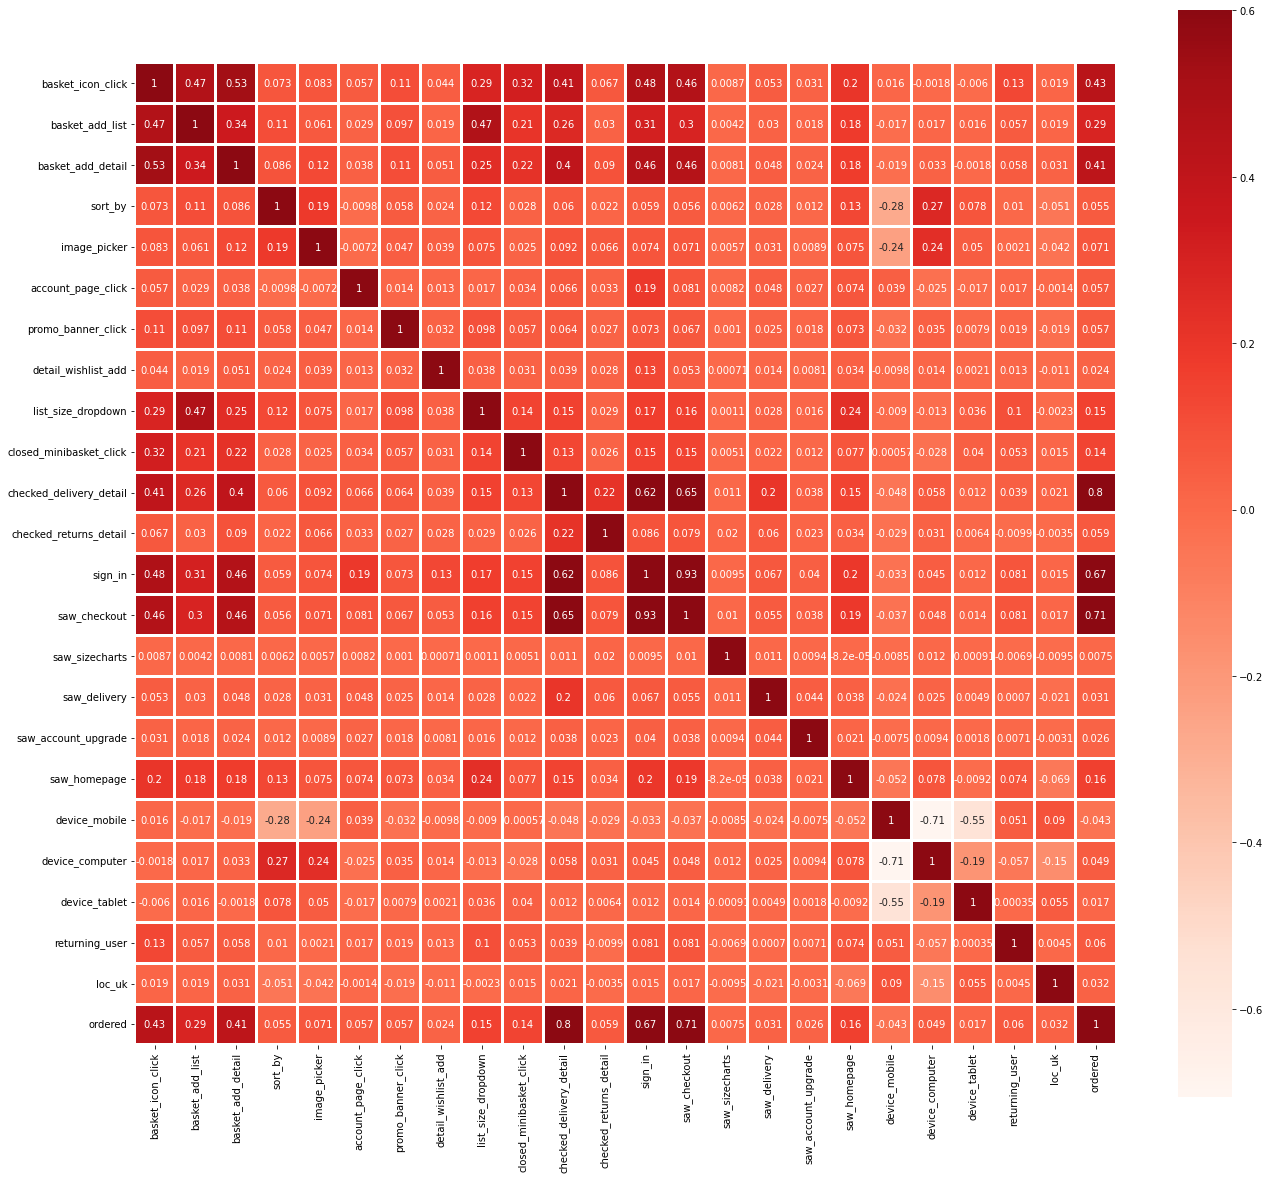

In [124]:
correlation = training.corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation, vmax = 0.6, center = 0, annot = True, square = True, linewidths = 2, cmap = 'Reds')
plt.show

In [125]:
training.corr()['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

We can remove the features device_mobile, saw_sizecharts, device_tablet and device_computer as they are weakly correlated.

In [126]:
training = training.drop(['device_mobile', 'saw_sizecharts', 'device_tablet', 'device_computer'], axis = 1)

In [127]:
print(training.columns)

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_delivery', 'saw_account_upgrade', 'saw_homepage',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')


In [128]:
y = training['ordered']
x = training.drop(['ordered', 'UserID'],axis = 1)

In [129]:
#split data into train and test with 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [168]:
print('x_train:', np.shape(x_train))
print('y_train:', np.shape(y_train))
print('x_test:', np.shape(x_test))
print('y_test:', np.shape(y_test))

x_train: (318780, 19)
y_train: (318780,)
x_test: (136621, 19)
y_test: (136621,)


### LOGISTIC REGRESSION

In [175]:
LogReg_model = LogisticRegression()

In [176]:
LogReg_model.fit(x_train,y_train)

LogisticRegression()

In [177]:
LogReg_pred = LogReg_model.predict(x_test)

In [178]:
confusion_matrix(y_test, LogReg_pred)

array([[130082,    878],
       [    72,   5589]])

In [179]:
LogReg_accuracy = accuracy_score(y_test, LogReg_pred)
print(LogReg_accuracy)

0.9930464569868468


### NAIVE BAYES

In [136]:
nb_classifier = GaussianNB()
nb_classifier = nb_classifier.fit(x_train, y_train)

In [137]:
nb_pred = nb_classifier.predict(x_test)

In [138]:
confusion_matrix(y_test, nb_pred)

array([[129415,   1545],
       [    65,   5596]])

In [139]:
nb_accuracy = accuracy_score(y_test, nb_pred)
print(nb_accuracy)

0.9882155744724457


### RANDOM FOREST

In [140]:
forest = RandomForestClassifier(n_estimators = 150, criterion = "entropy")
forest = forest.fit(x_train, y_train)

In [141]:
forest_pred = forest.predict(x_test)

In [142]:
confusion_matrix(y_test, forest_pred)

array([[130106,    854],
       [   124,   5537]])

In [143]:
rf_accuracy = accuracy_score(y_test, forest_pred)
print(rf_accuracy)

0.9928415104559328


### SUPPORT VECTOR MACHINE (SVM)

In [144]:
clf = svm.SVC(kernel='linear')
clf = clf.fit(x_train, y_train)

In [145]:
clf_pred = clf.predict(x_test)

In [146]:
confusion_matrix(y_test, clf_pred)

array([[130047,    913],
       [    59,   5602]])

In [147]:
svm_accuracy = accuracy_score(y_test, clf_pred)
print(svm_accuracy)

0.9928854275697001


### K-Nearest Neighbour

In [154]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [159]:
confusion_matrix(y_test, knn_pred)

array([[130201,    759],
       [   516,   5145]])

In [156]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

0.9906676133244523


In [158]:
print("Accuracies for all models")
print("Logistic Regression    ", LogReg_accuracy)
print("Random Forest          ", rf_accuracy)
print("Support Vector Machine ", svm_accuracy)
print("K-Nearest Neighbour    ", knn_accuracy)
print("Naive Bayes            ", nb_accuracy)

Accuracies for all models
Logistic Regression     0.9930464569868468
Random Forest           0.9928415104559328
Support Vector Machine  0.9928854275697001
K-Nearest Neighbour     0.9906676133244523
Naive Bayes             0.9882155744724457


It can be seen that Logistic Regression is the most accurate after comparison.

Now we can use the test sample given to us to make predictions on it.

In [180]:
testing = pd.read_csv('/content/testing_sample.csv')

In [181]:
print(testing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

Now we isolate UserIDs into one field so it matches our training data.

In [182]:
userids = testing.UserID
testing = testing.drop(['ordered','UserID','device_mobile','saw_sizecharts','device_tablet','device_computer'], axis = 1)

In [183]:
print(testing.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_delivery', 'saw_account_upgrade', 'saw_homepage',
       'returning_user', 'loc_uk'],
      dtype='object')


Confirm that it matches our training set.

In [184]:
x.shape

(455401, 19)

In [185]:
testing.shape

(151655, 19)

In [186]:
testing['propensity'] = LogReg_model.predict_proba(testing)[:,1]

In [187]:
print(testing.head(10))

   basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  1        0   
4                  0                0                  0        0   
5                  1                0                  1        0   
6                  0                0                  0        0   
7                  0                0                  0        0   
8                  1                1                  1        0   
9                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   


Now we concatenate this with their respective UserIDs so they can be identified.

In [191]:
pd.DataFrame(userids)
results = pd.concat([userids, testing], axis = 1)

Now lets see the result

In [192]:
print(results.head(45))

                                 UserID  basket_icon_click  basket_add_list  \
0   9d24-25k4-47889d24-25k4-494b-398124                  0                0   
1   7732-1k58-47887732-1k58-4475-679678                  0                0   
2   94k2-632j-471394k2-632j-4b4j-228160                  0                0   
3   jdd8-419d-4714jdd8-419d-4198-674376                  0                0   
4   7473-7595-47147473-7595-4757-227547                  0                0   
5   7j3d-j382-47157j3d-j382-4d3b-955343                  1                0   
6   bb4d-8019-4715bb4d-8019-4d42-763898                  0                0   
7   d09k-j446-4716d09k-j446-4469-572703                  0                0   
8    1397-7143-47171397-7143-4969-95351                  1                1   
9   3j36-dj4d-47183j36-dj4d-4478-404497                  0                0   
10   82b1-659j-471882b1-659j-45j1-32901                  0                0   
11  dj8d-141k-4718dj8d-141k-42db-743965             

In [195]:
results.to_csv('product-propensity-result.csv')